In [1]:
import numpy as np
from Utils.loginterp import loginterp

from scipy.optimize import curve_fit

import time
import sys

from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('../nbody/')

sim_dir = '../nbody/ANL/data/'

from cosmo import Cosmology

cosmo = Cosmology(dir=sim_dir)

In [3]:
from EPT.ept_irresum_fftw import REPT

In [4]:
k, pnw = np.loadtxt('../velocity_moments/ir_resum/ANL15_matterpower_nowiggle.dat').T
k, p = np.loadtxt('../velocity_moments/ir_resum/ANL15_matterpower.out').T

In [8]:
# First do the Power Spectrum:
t1 = time.time()
zelda = REPT(k, cosmo.iDz(0.8)**2 * p, cosmo.iDz(0.8)**2 * pnw, beyond_gauss = True, one_loop= True, third_order=True,\
                import_wisdom=False, cutoff=20, extrap_min = -5, extrap_max = 3, N = 2000, threads=1)
t2 = time.time()
print(t2-t1)

0.5599031448364258


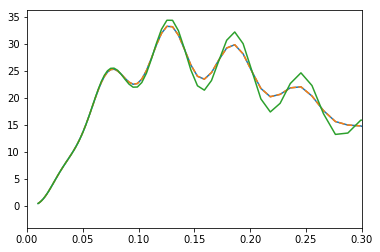

In [11]:
plt.plot(zelda.kv, zelda.kv**3 * (zelda.s0ktable)[:,3] )
plt.plot(zelda.kv, zelda.kv**3 * (zelda.s0ktable_nw + zelda.s0ktable_w)[:,3],'--' )
plt.plot(zelda.kv, zelda.kv**3 * zelda.ept.s0ktable_ept[:,3])
#plt.plot(k, k*cosmo.iDz(0.8)**2 * p)
plt.xlim(0,0.3)
plt.show()

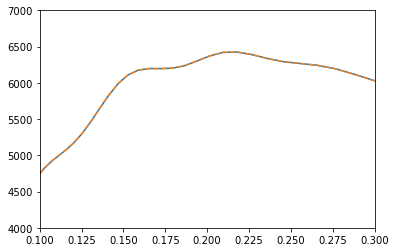

In [14]:
#plt.plot(zelda.kv, zelda.kv**4 * zelda.ept.k4)
#plt.plot(zelda.kv, zelda.kv**5 * zelda.ept_nw.k4)
plt.plot(zelda.kv, zelda.kv**4 * zelda.k4)
plt.plot(zelda.kv, zelda.kv**4 * (zelda.k4_nw + zelda.k4_w),'--')
plt.xlim(0.1,0.3)
plt.ylim(4000,7000)
plt.show()